# Leitura dos dados

In [1]:
import pandas as pd

In [2]:
pedido = pd.read_csv('pedido.csv')
pedido.head()

idPedido                      dtPedido flKetchup             descUF   
0         0  2023-05-11T10:59:33.000+0000       NaN              Goiás  \
1         1  2023-05-11T11:23:42.000+0000       NaN             Paraná   
2         2  2023-05-11T11:24:29.000+0000       NaN          São Paulo   
3         3  2023-05-11T11:29:39.000+0000       NaN          São Paulo   
4         4  2023-05-11T11:31:30.000+0000       NaN  Rio Grande do Sul   

                    txtRecado  
0                         NaN  
1  Aquela pizza perfeita! :-D  
2            Muito obrigado!!  
3                         NaN  
4        Capricha no peperoni

In [3]:
produto = pd.read_csv('produto.csv')
produto.head()

descItem  vlPreco
0    abacate     5.25
1    abacaxi     2.50
2  abobrinha     2.00
3  alcaparra     3.00
4       alho     1.00

In [4]:
item_pedido = pd.read_csv('item_pedido.csv')
item_pedido.head()

idPedido   descTipoItem           descItem
0         0         bebida       refrigerante
1         0          borda  borda tradicional
2         0  ingrediente 1          pepperoni
3         0  ingrediente 2            orégano
4         0  ingrediente 3             frango

# Limpeza

In [5]:
pedido['dtPedido'] = pd.to_datetime(pedido['dtPedido'])
pedido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106 entries, 0 to 1105
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   idPedido   1106 non-null   int64              
 1   dtPedido   1106 non-null   datetime64[ns, UTC]
 2   flKetchup  1097 non-null   object             
 3   descUF     1106 non-null   object             
 4   txtRecado  538 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(1), object(3)
memory usage: 43.3+ KB


In [6]:
pedido['diaSemana'] = pedido['dtPedido'].dt.day_name()
pedido['horaCompleta'] = pedido['dtPedido'].dt.time
pedido['hora'] = pedido['dtPedido'].dt.hour

In [7]:
pedido.diaSemana.unique()

array(['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday'], dtype=object)

In [8]:
dia_semana_pt = {'Sunday': 'Domingo','Monday':'Segunda-Feira',
                 'Tuesday':'Terça-Feira','Wednesday':'Quarta-Feira',
                 'Thursday':'Quinta-Feira','Friday':'Sexta-Feira',
                 'Saturday':'Sábado'}

In [9]:
pedido['diaSemana'] = pedido['diaSemana'].map(dia_semana_pt)
pedido.head()

idPedido                  dtPedido flKetchup             descUF   
0         0 2023-05-11 10:59:33+00:00       NaN              Goiás  \
1         1 2023-05-11 11:23:42+00:00       NaN             Paraná   
2         2 2023-05-11 11:24:29+00:00       NaN          São Paulo   
3         3 2023-05-11 11:29:39+00:00       NaN          São Paulo   
4         4 2023-05-11 11:31:30+00:00       NaN  Rio Grande do Sul   

                    txtRecado     diaSemana horaCompleta  hora  
0                         NaN  Quinta-Feira     10:59:33    10  
1  Aquela pizza perfeita! :-D  Quinta-Feira     11:23:42    11  
2            Muito obrigado!!  Quinta-Feira     11:24:29    11  
3                         NaN  Quinta-Feira     11:29:39    11  
4        Capricha no peperoni  Quinta-Feira     11:31:30    11

# Merge

In [10]:
df = pd.merge(pedido, item_pedido, on='idPedido', how='inner')
df.head()

idPedido                  dtPedido flKetchup descUF txtRecado   
0         0 2023-05-11 10:59:33+00:00       NaN  Goiás       NaN  \
1         0 2023-05-11 10:59:33+00:00       NaN  Goiás       NaN   
2         0 2023-05-11 10:59:33+00:00       NaN  Goiás       NaN   
3         0 2023-05-11 10:59:33+00:00       NaN  Goiás       NaN   
4         0 2023-05-11 10:59:33+00:00       NaN  Goiás       NaN   

      diaSemana horaCompleta  hora   descTipoItem           descItem  
0  Quinta-Feira     10:59:33    10         bebida       refrigerante  
1  Quinta-Feira     10:59:33    10          borda  borda tradicional  
2  Quinta-Feira     10:59:33    10  ingrediente 1          pepperoni  
3  Quinta-Feira     10:59:33    10  ingrediente 2            orégano  
4  Quinta-Feira     10:59:33    10  ingrediente 3             frango

In [11]:
df = pd.merge(df, produto, on='descItem', how='inner')
df.head()

idPedido                  dtPedido flKetchup     descUF   
0         0 2023-05-11 10:59:33+00:00       NaN      Goiás  \
1         1 2023-05-11 11:23:42+00:00       NaN     Paraná   
2         3 2023-05-11 11:29:39+00:00       NaN  São Paulo   
3         8 2023-05-11 12:01:49+00:00       NaN      Goiás   
4        10 2023-05-11 12:19:47+00:00      True      Goiás   

                                       txtRecado     diaSemana horaCompleta   
0                                            NaN  Quinta-Feira     10:59:33  \
1                     Aquela pizza perfeita! :-D  Quinta-Feira     11:23:42   
2                                            NaN  Quinta-Feira     11:29:39   
3                                            NaN  Quinta-Feira     12:01:49   
4  Amo vocês, quero dividir a pizza com vocês ♥️  Quinta-Feira     12:19:47   

   hora descTipoItem      descItem  vlPreco  
0    10       bebida  refrigerante     7.25  
1    11       bebida  refrigerante     7.25  
2    11       bebida  refrigerante     7.25  
3    12       bebida  refrigerante     7.25  
4    12       bebida  refrigerante     7.25

In [12]:
df = df.sort_values('idPedido')

# Análise

O objetivo é conseguir um pequeno resumo das operações por Estado e plotar isso em um mapa

## Ticket médio por estado

In [13]:
ticketMedio = df.groupby(['descUF', 'idPedido'])['vlPreco'].sum().groupby('descUF').mean().reset_index()
ticketMedio.columns = ['descUF','ticketMedio']
ticketMedio['ticketMedio'] = ticketMedio['ticketMedio'].round(2)
ticketMedio

descUF  ticketMedio
0                  Acre        52.50
1               Alagoas        42.31
2                 Amapá        50.20
3              Amazonas        46.79
4                 Bahia        45.37
5                 Ceará        46.95
6      Distrito Federal        43.16
7        Espírito Santo        45.83
8                 Goiás        45.21
9              Maranhão        44.96
10          Mato Grosso        46.39
11   Mato Grosso do Sul        47.16
12         Minas Gerais        46.10
13               Paraná        44.68
14              Paraíba        47.18
15                 Pará        48.15
16           Pernambuco        42.49
17                Piauí        46.17
18  Rio Grande do Norte        46.75
19    Rio Grande do Sul        45.21
20       Rio de Janeiro        45.69
21             Rondônia        46.10
22              Roraima        42.50
23       Santa Catarina        44.40
24              Sergipe        49.20
25            São Paulo        44.77
26            Tocantins        41.55

## Faturamento

In [14]:
faturamento = df.groupby('descUF')['vlPreco'].sum().reset_index()
faturamento.columns = ['descUF','faturamento']
faturamento

descUF  faturamento
0                  Acre       105.00
1               Alagoas       507.75
2                 Amapá        50.20
3              Amazonas       187.15
4                 Bahia      1951.00
5                 Ceará      2065.60
6      Distrito Federal      1424.15
7        Espírito Santo      1466.60
8                 Goiás      1582.35
9              Maranhão       359.70
10          Mato Grosso       510.25
11   Mato Grosso do Sul       282.95
12         Minas Gerais      4241.15
13               Paraná      3396.00
14              Paraíba       707.75
15                 Pará       337.05
16           Pernambuco      1997.00
17                Piauí       230.85
18  Rio Grande do Norte       794.70
19    Rio Grande do Sul      2260.30
20       Rio de Janeiro      4705.95
21             Rondônia       276.60
22              Roraima        85.00
23       Santa Catarina      2042.55
24              Sergipe       541.20
25            São Paulo     17684.20
26            Tocantins       124.65

## Total de Pedidos por Estado

In [15]:
totalPedidos = pedido.groupby('descUF')['idPedido'].count().reset_index()
totalPedidos.columns = ['descUF','totalPedidos']
totalPedidos

descUF  totalPedidos
0                  Acre             2
1               Alagoas            12
2                 Amapá             1
3              Amazonas             4
4                 Bahia            43
5                 Ceará            44
6      Distrito Federal            33
7        Espírito Santo            32
8                 Goiás            35
9              Maranhão             8
10          Mato Grosso            11
11   Mato Grosso do Sul             6
12         Minas Gerais            92
13               Paraná            76
14              Paraíba            15
15                 Pará             7
16           Pernambuco            47
17                Piauí             5
18  Rio Grande do Norte            17
19    Rio Grande do Sul            50
20       Rio de Janeiro           103
21             Rondônia             6
22              Roraima             2
23       Santa Catarina            46
24              Sergipe            11
25            São Paulo           395
26            Tocantins             3

## Dia mais movimentado por estado

In [16]:
diaMovimentado = pedido.groupby(['descUF', 'diaSemana'])['idPedido'].count().groupby('descUF').idxmax().reset_index()
diaMovimentado.columns = ['descUF','diaMovimentado']
diaMovimentado['diaMovimentado'] = diaMovimentado['diaMovimentado'].apply(lambda x: x[1])
diaMovimentado

descUF diaMovimentado
0                  Acre   Quarta-Feira
1               Alagoas   Quarta-Feira
2                 Amapá   Quarta-Feira
3              Amazonas   Quarta-Feira
4                 Bahia   Quarta-Feira
5                 Ceará   Quarta-Feira
6      Distrito Federal   Quarta-Feira
7        Espírito Santo   Quarta-Feira
8                 Goiás   Quarta-Feira
9              Maranhão   Quarta-Feira
10          Mato Grosso   Quarta-Feira
11   Mato Grosso do Sul   Quarta-Feira
12         Minas Gerais   Quarta-Feira
13               Paraná   Quarta-Feira
14              Paraíba   Quarta-Feira
15                 Pará   Quarta-Feira
16           Pernambuco   Quarta-Feira
17                Piauí    Sexta-Feira
18  Rio Grande do Norte   Quarta-Feira
19    Rio Grande do Sul   Quarta-Feira
20       Rio de Janeiro   Quarta-Feira
21             Rondônia   Quinta-Feira
22              Roraima   Quarta-Feira
23       Santa Catarina   Quarta-Feira
24              Sergipe   Quarta-Feira
25            São Paulo   Quarta-Feira
26            Tocantins   Quarta-Feira

## Item favorito por Estado

In [17]:
ingredienteFavorito = df[df.descTipoItem.str.startswith('ingrediente')]
ingredienteFavorito = ingredienteFavorito.groupby(['descUF', 'descItem'])['descItem'].count().groupby('descUF').idxmax().reset_index()
ingredienteFavorito.columns = ['descUF','itemFav']
ingredienteFavorito['itemFav'] = ingredienteFavorito['itemFav'].apply(lambda x: x[1])
ingredienteFavorito['itemFav'] = ingredienteFavorito['itemFav'].str.title()
ingredienteFavorito

descUF    itemFav
0                  Acre  Berinjela
1               Alagoas     Cebola
2                 Amapá      Bacon
3              Amazonas   Azeitona
4                 Bahia     Cebola
5                 Ceará     Tomate
6      Distrito Federal  Pepperoni
7        Espírito Santo      Bacon
8                 Goiás   Azeitona
9              Maranhão     Cebola
10          Mato Grosso       Alho
11   Mato Grosso do Sul  Calabresa
12         Minas Gerais      Bacon
13               Paraná     Tomate
14              Paraíba      Bacon
15                 Pará      Bacon
16           Pernambuco     Cebola
17                Piauí     Frango
18  Rio Grande do Norte     Cebola
19    Rio Grande do Sul  Pepperoni
20       Rio de Janeiro     Cebola
21             Rondônia  Calabresa
22              Roraima       Alho
23       Santa Catarina      Bacon
24              Sergipe     Cebola
25            São Paulo     Tomate
26            Tocantins       Alho

## Borda mais pedida por Estado

In [18]:
bordaFavorita = df[df.descTipoItem == 'borda']
bordaFavorita = bordaFavorita.groupby(['descUF', 'descItem'])['descItem'].count().groupby('descUF').idxmax().reset_index()
bordaFavorita.columns = ['descUF','bordaFav']
bordaFavorita['bordaFav'] = bordaFavorita['bordaFav'].apply(lambda x: x[1])
bordaFavorita['bordaFav'] = bordaFavorita['bordaFav'].str.replace('borda', '').str.replace('sabor', '').str.title().str.lstrip()

bordaFavorita

descUF      bordaFav
0                  Acre  Cream Cheese
1               Alagoas   Tradicional
2                 Amapá      Catupiry
3              Amazonas      Catupiry
4                 Bahia   Tradicional
5                 Ceará      Catupiry
6      Distrito Federal   Tradicional
7        Espírito Santo      Catupiry
8                 Goiás   Tradicional
9              Maranhão   Tradicional
10          Mato Grosso      Catupiry
11   Mato Grosso do Sul      Catupiry
12         Minas Gerais      Catupiry
13               Paraná   Tradicional
14              Paraíba   Tradicional
15                 Pará  Cream Cheese
16           Pernambuco   Tradicional
17                Piauí       Cheddar
18  Rio Grande do Norte      Catupiry
19    Rio Grande do Sul   Tradicional
20       Rio de Janeiro   Tradicional
21             Rondônia   Tradicional
22              Roraima   Tradicional
23       Santa Catarina      Catupiry
24              Sergipe   Tradicional
25            São Paulo      Catupiry
26            Tocantins   Tradicional

# Merge Analise por Estado

In [19]:
df_por_estado = pd.merge(ticketMedio,totalPedidos,on='descUF')
df_por_estado.head()

descUF  ticketMedio  totalPedidos
0      Acre        52.50             2
1   Alagoas        42.31            12
2     Amapá        50.20             1
3  Amazonas        46.79             4
4     Bahia        45.37            43

In [20]:
df_por_estado = pd.merge(df_por_estado,faturamento,on='descUF')
df_por_estado.head()

descUF  ticketMedio  totalPedidos  faturamento
0      Acre        52.50             2       105.00
1   Alagoas        42.31            12       507.75
2     Amapá        50.20             1        50.20
3  Amazonas        46.79             4       187.15
4     Bahia        45.37            43      1951.00

In [21]:
df_por_estado = pd.merge(df_por_estado,diaMovimentado,on='descUF')
df_por_estado.head()

descUF  ticketMedio  totalPedidos  faturamento diaMovimentado
0      Acre        52.50             2       105.00   Quarta-Feira
1   Alagoas        42.31            12       507.75   Quarta-Feira
2     Amapá        50.20             1        50.20   Quarta-Feira
3  Amazonas        46.79             4       187.15   Quarta-Feira
4     Bahia        45.37            43      1951.00   Quarta-Feira

In [22]:
df_por_estado = pd.merge(df_por_estado,ingredienteFavorito,on='descUF')
df_por_estado.head()

descUF  ticketMedio  totalPedidos  faturamento diaMovimentado    itemFav
0      Acre        52.50             2       105.00   Quarta-Feira  Berinjela
1   Alagoas        42.31            12       507.75   Quarta-Feira     Cebola
2     Amapá        50.20             1        50.20   Quarta-Feira      Bacon
3  Amazonas        46.79             4       187.15   Quarta-Feira   Azeitona
4     Bahia        45.37            43      1951.00   Quarta-Feira     Cebola

In [23]:
df_por_estado = pd.merge(df_por_estado,bordaFavorita,on='descUF')
df_por_estado.head()

descUF  ticketMedio  totalPedidos  faturamento diaMovimentado    itemFav   
0      Acre        52.50             2       105.00   Quarta-Feira  Berinjela  \
1   Alagoas        42.31            12       507.75   Quarta-Feira     Cebola   
2     Amapá        50.20             1        50.20   Quarta-Feira      Bacon   
3  Amazonas        46.79             4       187.15   Quarta-Feira   Azeitona   
4     Bahia        45.37            43      1951.00   Quarta-Feira     Cebola   

       bordaFav  
0  Cream Cheese  
1   Tradicional  
2      Catupiry  
3      Catupiry  
4   Tradicional

## Visualizacao

In [24]:
import folium

coord = {
    'descUF': ['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará', 'Distrito Federal',
               'Espírito Santo', 'Goiás', 'Maranhão', 'Mato Grosso', 'Mato Grosso do Sul',
               'Minas Gerais', 'Pará', 'Paraíba', 'Paraná', 'Pernambuco', 'Piauí',
               'Rio de Janeiro', 'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia',
               'Roraima', 'Santa Catarina', 'São Paulo', 'Sergipe', 'Tocantins'],
    'lat': [-9.0238, -9.5713, 1.3545, -3.4653, -12.5797, -5.4984, -15.7998, -19.1834, -15.827, -5.42,
            -12.6819, -20.7722, -18.5265, -3.4653, -7.24, -24.89, -8.8137, -6.6, -22.9068, -5.4026,
            -30.0346, -11.5057, 2.7376, -27.2423, -23.5505, -10.5741, -10.1753],
    'lon': [-70.812, -36.7819, -51.916, -62.2159, -41.7007, -39.3206, -47.8645, -40.3089, -49.8362, -45.4444,
            -56.9211, -54.7852, -44.1588, -52.8696, -36.782, -51.55, -36.9541, -42.2792, -43.1729, -36.9541,
            -51.2177, -63.5806, -62.0751, -50.2189, -46.6333, -37.3857, -48.2982]
}

coordenadas = pd.DataFrame(coord)

In [25]:
df_por_estado = pd.merge(df_por_estado,coordenadas,on='descUF')
df_por_estado

descUF  ticketMedio  totalPedidos  faturamento   
0                  Acre        52.50             2       105.00  \
1               Alagoas        42.31            12       507.75   
2                 Amapá        50.20             1        50.20   
3              Amazonas        46.79             4       187.15   
4                 Bahia        45.37            43      1951.00   
5                 Ceará        46.95            44      2065.60   
6      Distrito Federal        43.16            33      1424.15   
7        Espírito Santo        45.83            32      1466.60   
8                 Goiás        45.21            35      1582.35   
9              Maranhão        44.96             8       359.70   
10          Mato Grosso        46.39            11       510.25   
11   Mato Grosso do Sul        47.16             6       282.95   
12         Minas Gerais        46.10            92      4241.15   
13               Paraná        44.68            76      3396.00   
14              Paraíba        47.18            15       707.75   
15                 Pará        48.15             7       337.05   
16           Pernambuco        42.49            47      1997.00   
17                Piauí        46.17             5       230.85   
18  Rio Grande do Norte        46.75            17       794.70   
19    Rio Grande do Sul        45.21            50      2260.30   
20       Rio de Janeiro        45.69           103      4705.95   
21             Rondônia        46.10             6       276.60   
22              Roraima        42.50             2        85.00   
23       Santa Catarina        44.40            46      2042.55   
24              Sergipe        49.20            11       541.20   
25            São Paulo        44.77           395     17684.20   
26            Tocantins        41.55             3       124.65   

   diaMovimentado    itemFav      bordaFav      lat      lon  
0    Quarta-Feira  Berinjela  Cream Cheese  -9.0238 -70.8120  
1    Quarta-Feira     Cebola   Tradicional  -9.5713 -36.7819  
2    Quarta-Feira      Bacon      Catupiry   1.3545 -51.9160  
3    Quarta-Feira   Azeitona      Catupiry  -3.4653 -62.2159  
4    Quarta-Feira     Cebola   Tradicional -12.5797 -41.7007  
5    Quarta-Feira     Tomate      Catupiry  -5.4984 -39.3206  
6    Quarta-Feira  Pepperoni   Tradicional -15.7998 -47.8645  
7    Quarta-Feira      Bacon      Catupiry -19.1834 -40.3089  
8    Quarta-Feira   Azeitona   Tradicional -15.8270 -49.8362  
9    Quarta-Feira     Cebola   Tradicional  -5.4200 -45.4444  
10   Quarta-Feira       Alho      Catupiry -12.6819 -56.9211  
11   Quarta-Feira  Calabresa      Catupiry -20.7722 -54.7852  
12   Quarta-Feira      Bacon      Catupiry -18.5265 -44.1588  
13   Quarta-Feira     Tomate   Tradicional -24.8900 -51.5500  
14   Quarta-Feira      Bacon   Tradicional  -7.2400 -36.7820  
15   Quarta-Feira      Bacon  Cream Cheese  -3.4653 -52.8696  
16   Quarta-Feira     Cebola   Tradicional  -8.8137 -36.9541  
17    Sexta-Feira     Frango       Cheddar  -6.6000 -42.2792  
18   Quarta-Feira     Cebola      Catupiry  -5.4026 -36.9541  
19   Quarta-Feira  Pepperoni   Tradicional -30.0346 -51.2177  
20   Quarta-Feira     Cebola   Tradicional -22.9068 -43.1729  
21   Quinta-Feira  Calabresa   Tradicional -11.5057 -63.5806  
22   Quarta-Feira       Alho   Tradicional   2.7376 -62.0751  
23   Quarta-Feira      Bacon      Catupiry -27.2423 -50.2189  
24   Quarta-Feira     Cebola   Tradicional -10.5741 -37.3857  
25   Quarta-Feira     Tomate      Catupiry -23.5505 -46.6333  
26   Quarta-Feira       Alho   Tradicional -10.1753 -48.2982


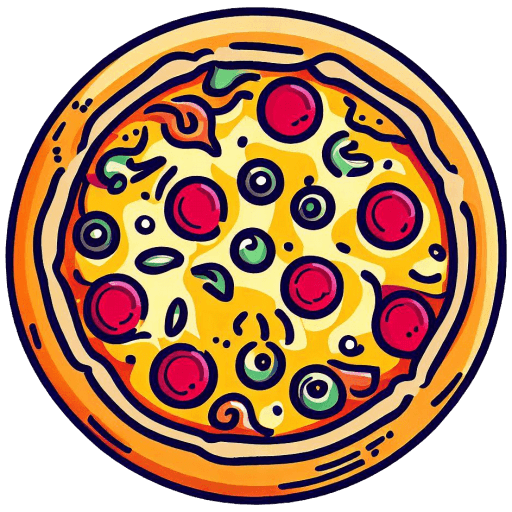
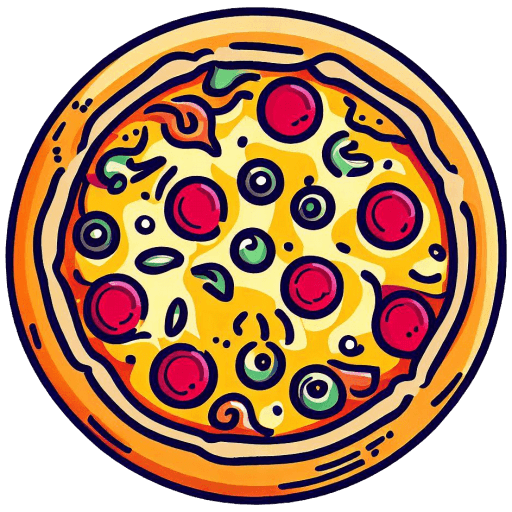
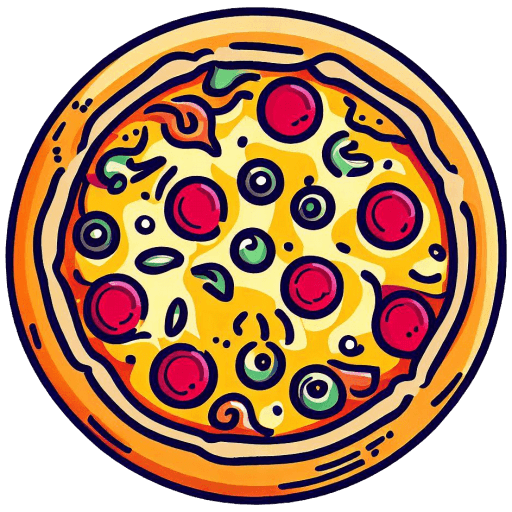
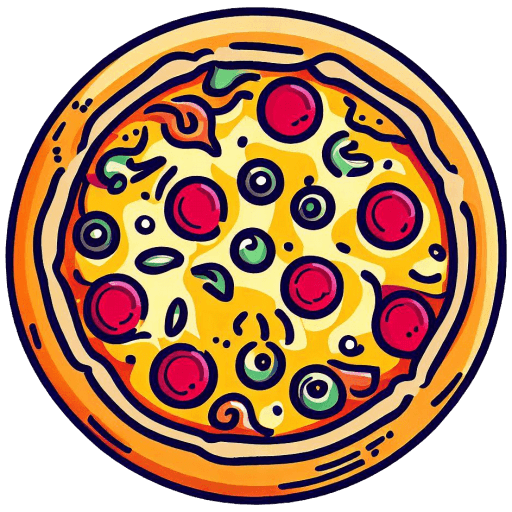
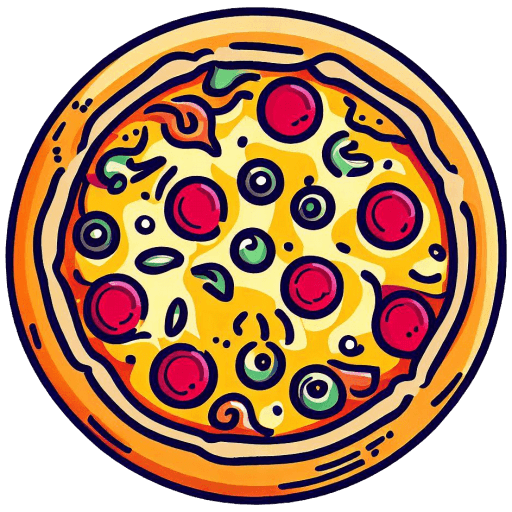
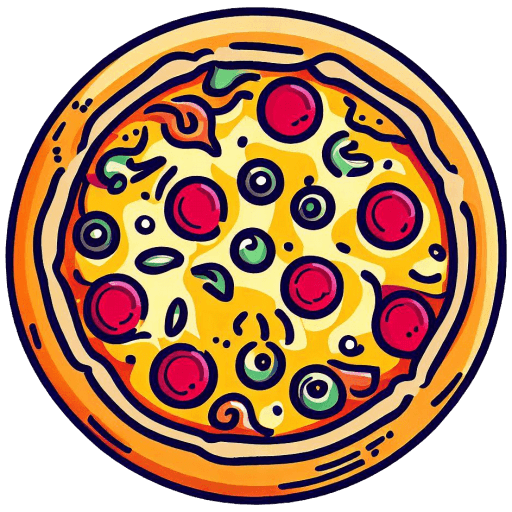
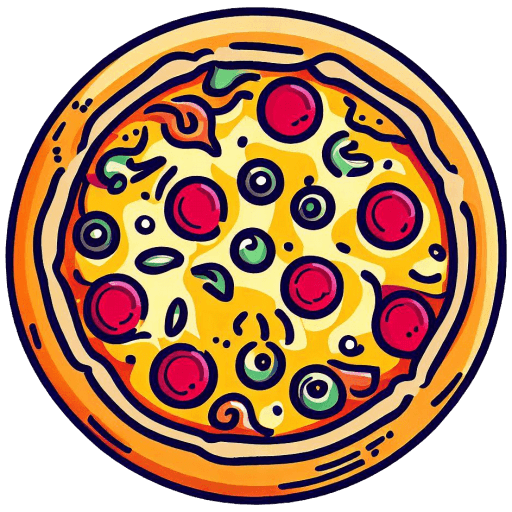
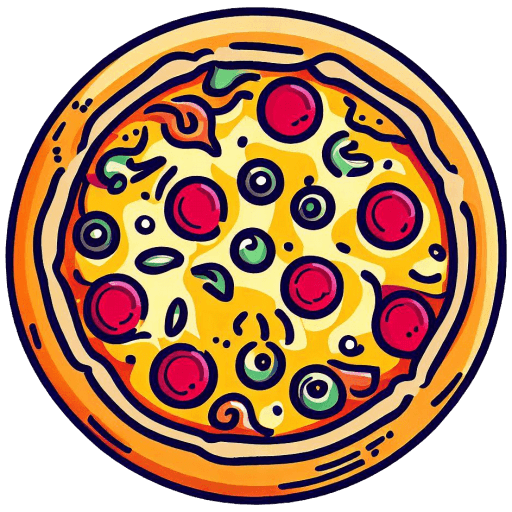
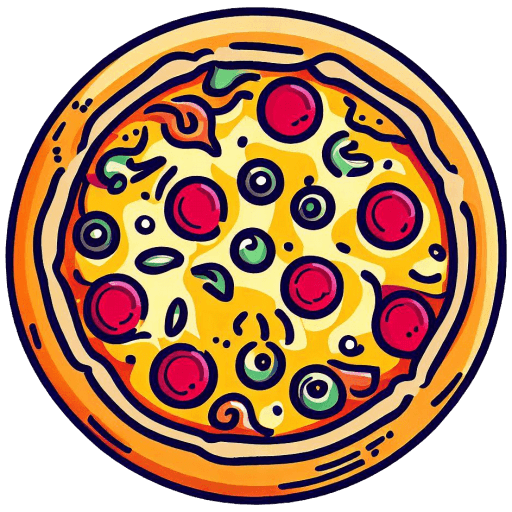
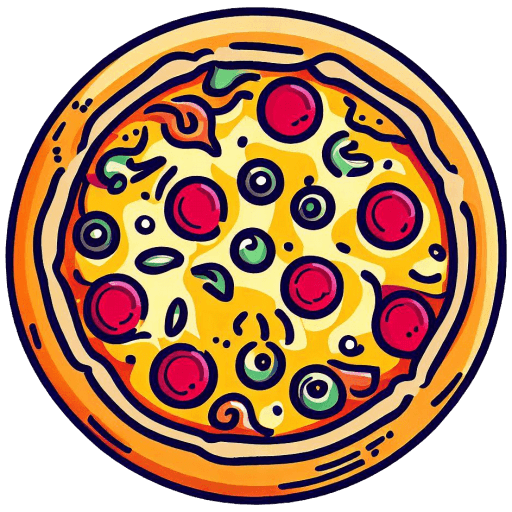
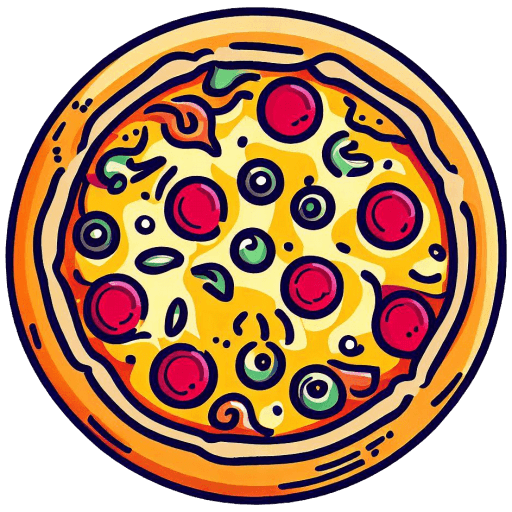
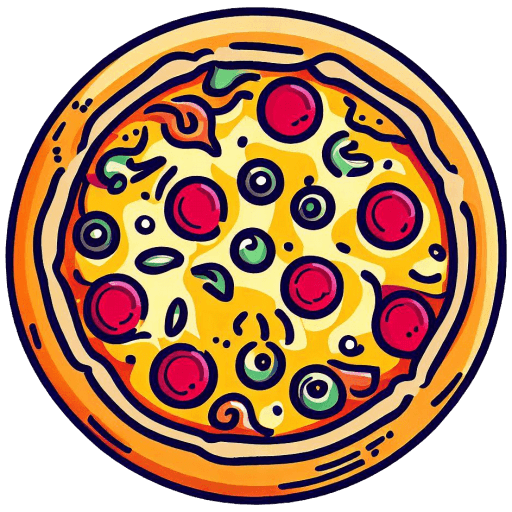
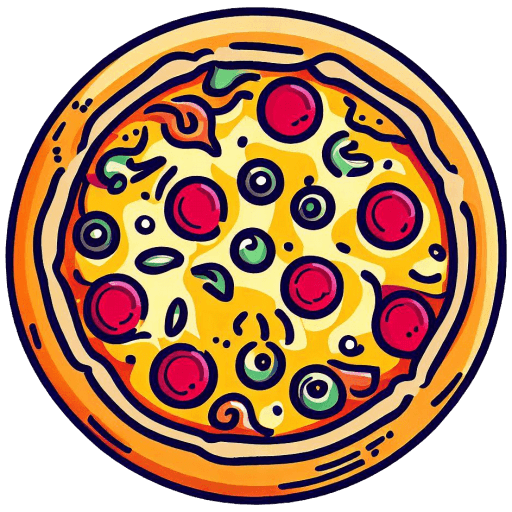
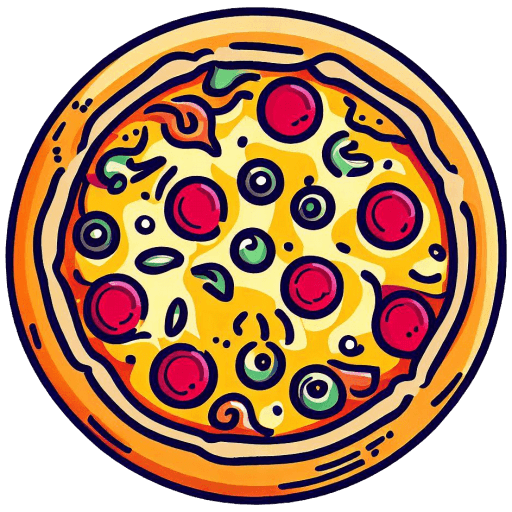
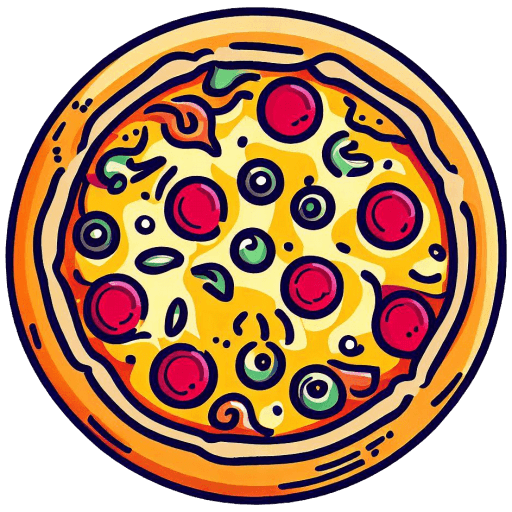
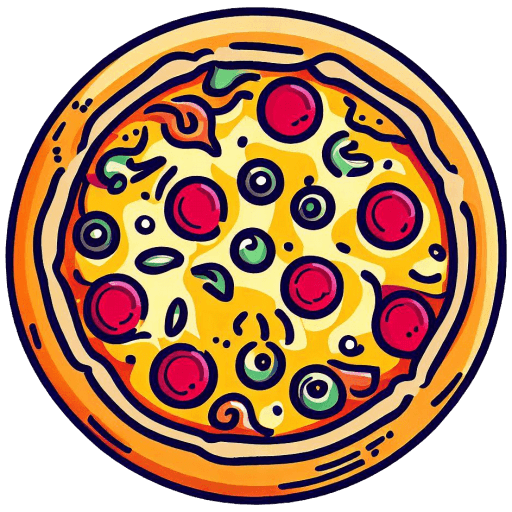
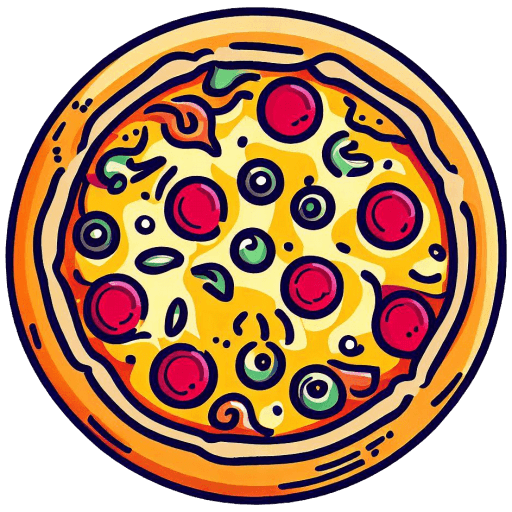
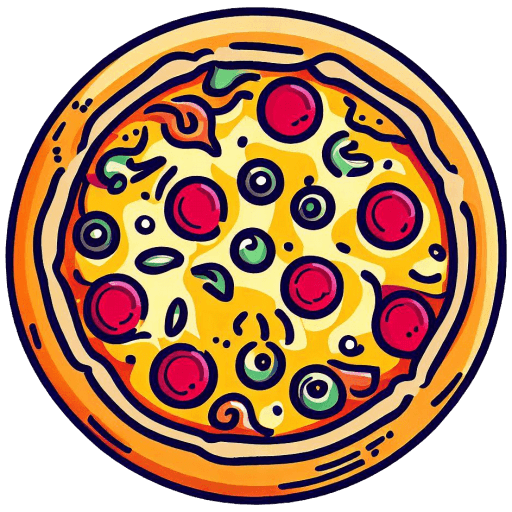
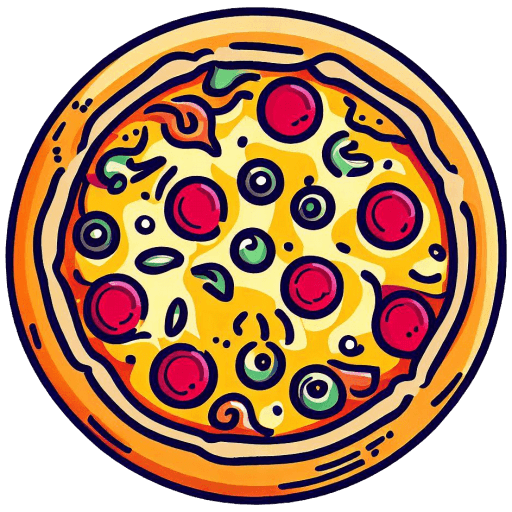
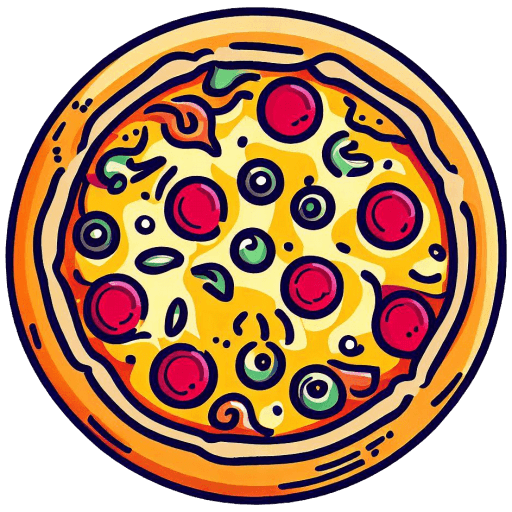
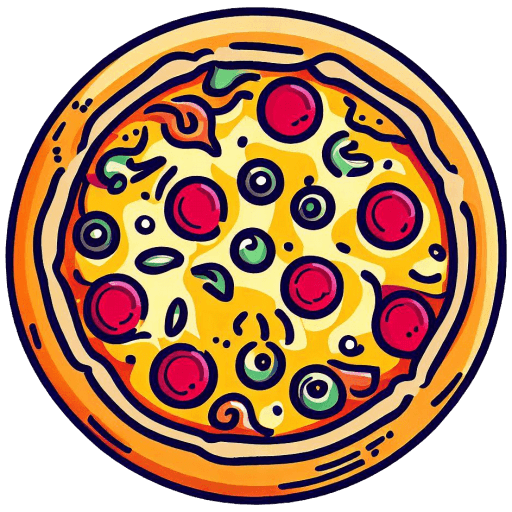
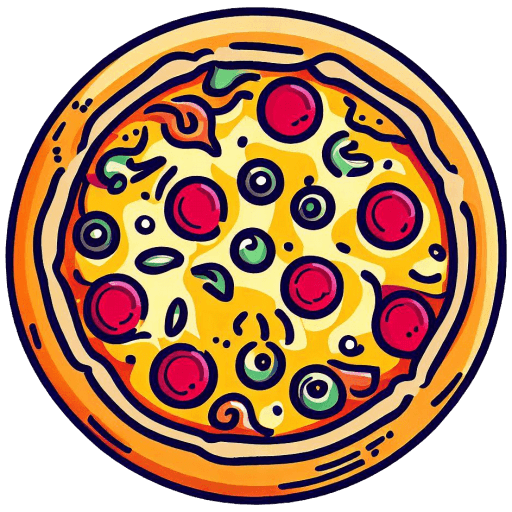
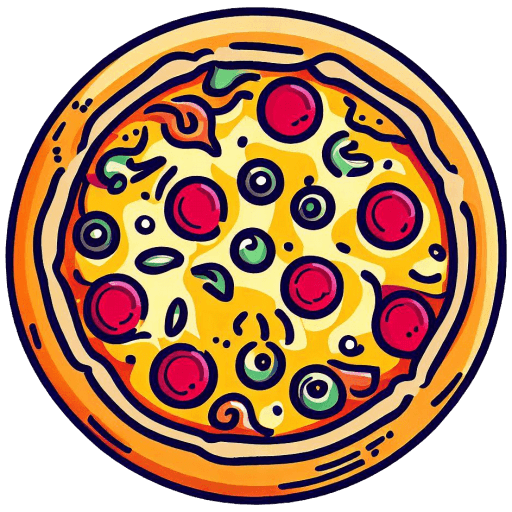
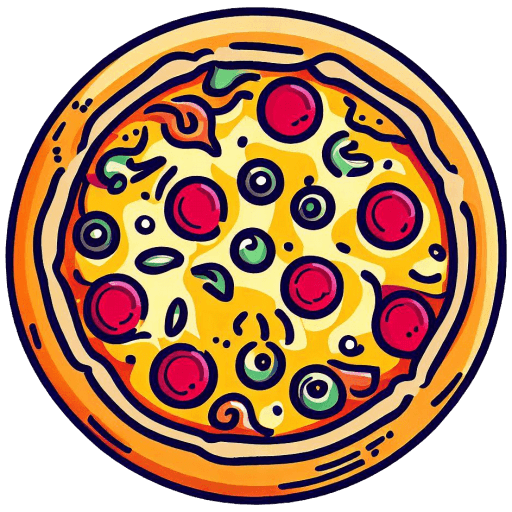
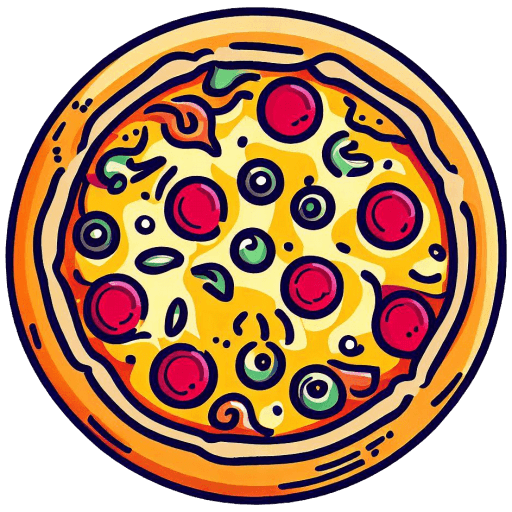
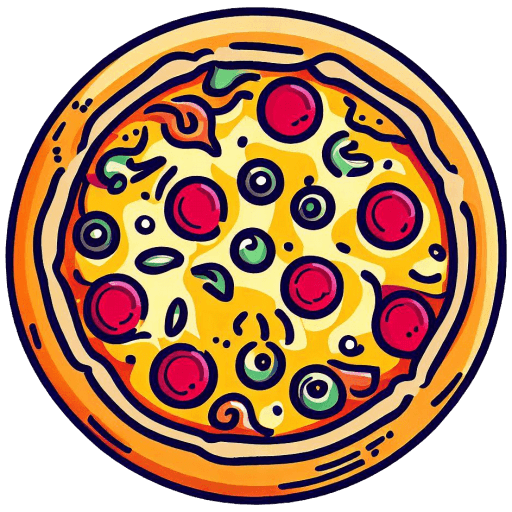
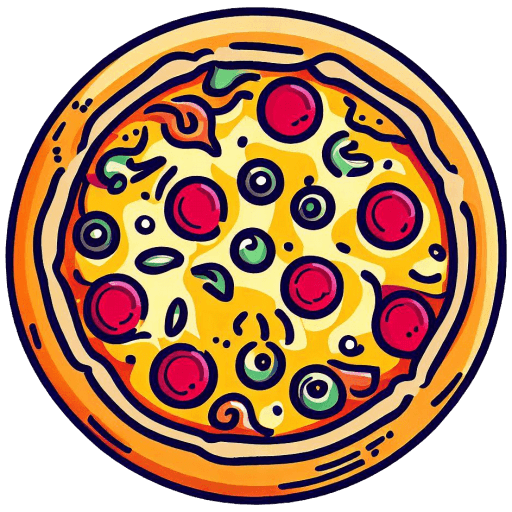

In [34]:
# Criar um mapa utilizando o Folium
mapa = folium.Map(location=[-15.77972, -47.92972], zoom_start=3.5)

# Adicionar marcadores no mapa com base nos dados do DataFrame
for index, row in df_por_estado.iterrows():
    tooltip_text = f"""<strong>{row['descUF']}</strong><br>
                        Faturamento: R$ {row['faturamento']}<br>
                        Ticket Médio: R${row['ticketMedio']}<br>
                        Total Pedidos: {row['totalPedidos']}<br>
                        Dia Mais Movimentado: {row['diaMovimentado']}<br>
                        Ingrediente Favorito: {row['itemFav']}<br>
                        Borda Favorita: {row['bordaFav']}<br>"""
    folium.Marker(location=[row['lat'], row['lon']],
                  icon=folium.CustomIcon(icon_image='icon_pizza.png', icon_size=(22, 22)),
                  tooltip=folium.Tooltip(tooltip_text, sticky=True)).add_to(mapa)

# Exibir o mapa
mapa

In [35]:
mapa.save('pizzaria.html')